Extinction: White Dwarf - Subdwarf Binary
============================

In this example, we'll reproduce Figure 4 in the extinction release paper ([Jones et al. 2020](http://phoebe-project.org/publications/2020Jones+)).

> "SDSS J2355 is a short-period post-CE binary comprising a relatively cool white dwarf (Teff∼13,250 K) and a low-mass, metal-poor, sub-dwarf star (spectral type ∼sdK7). As before, calculating synthetic light curves for the system with no extinction and then with extinction consistent with the Galactic bulge, we now see significant deviations between the two models in u, g and r bands" ([Jones et al. 2020](http://phoebe-project.org/publications/2020Jones+))

<img src="jones+20_fig4.png" alt="Figure 4" width="600px"/>

Setup
-----------------------------


Let's first make sure we have the latest version of PHOEBE 2.3 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [ ]:
!pip install -I "phoebe>=2.3,<2.4"

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.ipynb) for more details.

In [1]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
from matplotlib import gridspec

In [2]:
%matplotlib inline

In [3]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger('error')

b = phoebe.default_binary()

Adopt system parameters from [Rebassa-Mansergas+ 2019](https://ui.adsabs.harvard.edu/abs/2019NatAs...3..553R).

In [4]:
b.set_value('period', component='binary', value=0.0897780065*u.d)
b.set_value('teff', component='primary', value=13247*u.K)
b.set_value('teff', component='secondary', value=3650*u.K)
b.set_value('requiv', component='primary', value=0.0160*u.solRad)
b.set_value('requiv', component='secondary', value=0.1669*u.solRad)
b.flip_constraint('mass@primary', solve_for='sma@binary')
b.set_value('mass', component='primary', value=0.4477*u.solMass)
b.flip_constraint('mass@secondary', solve_for='q')
b.set_value('mass', component='secondary', value=0.1501*u.solMass)

Now we'll create datasets for LSST u,g,r, and i bands.

In [6]:
period = b.get_value('period', component='binary')
times=phoebe.linspace(-0.1*period, 0.6*period, 501)
b.add_dataset('lc', times=times, dataset='u', passband="LSST:u")
b.add_dataset('lc', times=times, dataset='g', passband="LSST:g")
b.add_dataset('lc', times=times, dataset='r', passband="LSST:r")
b.add_dataset('lc', times=times, dataset='i', passband="LSST:i")

<ParameterSet: 43 parameters | contexts: compute, figure, constraint, dataset>

And set options for the atmospheres and limb-darkening.

In [7]:
b.set_value_all('atm', component='primary', value='blackbody')
b.set_value_all('ld_mode', component='primary', value='manual')
b.set_value_all('ld_func', component='primary', value='quadratic')
b.set_value('ld_coeffs', component='primary', dataset='u', value=[0.2665,0.2544])
b.set_value('ld_coeffs', component='primary', dataset='g', value=[0.1421,0.3693])
b.set_value('ld_coeffs', component='primary', dataset='r', value=[0.1225,0.3086])
b.set_value('ld_coeffs', component='primary', dataset='i', value=[0.1063,0.2584])
b.set_value_all('ld_mode_bol@primary','manual')
b.set_value_all('ld_func_bol@primary','quadratic')
b.set_value('ld_coeffs_bol', component='primary', value=[0.1421,0.3693])

b.set_value_all('atm', component='secondary', value='phoenix')
b.set_value('abun', component='secondary', value=-1.55)

We'll set the inclination to 90 degrees and set some compute options.

In [8]:
b.set_value('incl', component='binary', value=90.0*u.deg)
b.set_value_all('ntriangles', value=10000)
b.set_value_all('intens_weighting', value='photon')

In [9]:
b.set_value('Rv', value=2.5)

For comparison, we'll first compute a model with zero extinction.

In [10]:
b.set_value('Av', value=0.0)
b.run_compute(model='noext',overwrite=True)

<ParameterSet: 10 parameters | contexts: figure, model>

And then a second model with extinction.

In [11]:
b.set_value('Av',2.0)
b.run_compute(model='ext',overwrite=True)

<ParameterSet: 10 parameters | contexts: figure, model>

Finally we'll convert the output fluxes to magnitudes and format the figure.

In [12]:
uextmags=-2.5*np.log10(b['value@fluxes@u@ext@model'])
unoextmags=-2.5*np.log10(b['value@fluxes@u@noext@model'])
uextmags_norm=uextmags-uextmags.min()+1
unoextmags_norm=unoextmags-unoextmags.min()+1
uresid=uextmags_norm-unoextmags_norm

gextmags=-2.5*np.log10(b['value@fluxes@g@ext@model'])
gnoextmags=-2.5*np.log10(b['value@fluxes@g@noext@model'])
gextmags_norm=gextmags-gextmags.min()+1
gnoextmags_norm=gnoextmags-gnoextmags.min()+1
gresid=gextmags_norm-gnoextmags_norm

rextmags=-2.5*np.log10(b['value@fluxes@r@ext@model'])
rnoextmags=-2.5*np.log10(b['value@fluxes@r@noext@model'])
rextmags_norm=rextmags-rextmags.min()+1
rnoextmags_norm=rnoextmags-rnoextmags.min()+1
rresid=rextmags_norm-rnoextmags_norm

iextmags=-2.5*np.log10(b['value@fluxes@i@ext@model'])
inoextmags=-2.5*np.log10(b['value@fluxes@i@noext@model'])
iextmags_norm=iextmags-iextmags.min()+1
inoextmags_norm=inoextmags-inoextmags.min()+1
iresid=iextmags_norm-inoextmags_norm

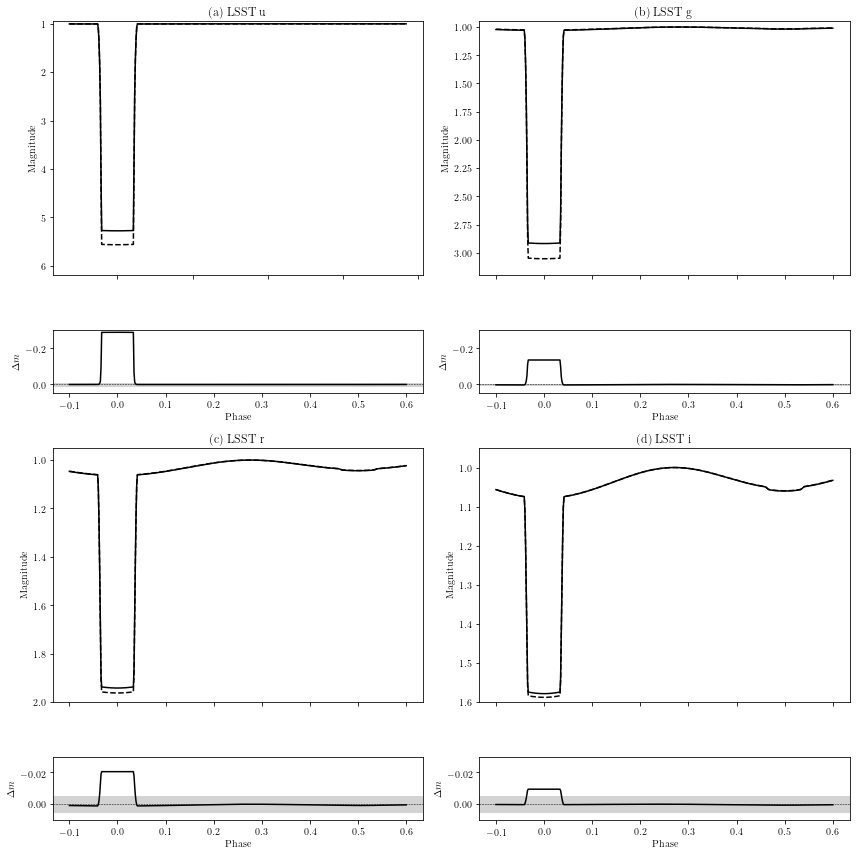

In [13]:
fig=plt.figure(figsize=(12,12))
gs=gridspec.GridSpec(4,2,height_ratios=[4,1,4,1],width_ratios=[1,1])

ax=plt.subplot(gs[0,0])
ax.plot(b['value@times@u@noext@model']/7.,unoextmags_norm,color='k',linestyle="--")
ax.plot(b['value@times@u@ext@model']/7.,uextmags_norm,color='k',linestyle="-")
ax.set_ylabel('Magnitude')
ax.set_xticklabels([])
ax.set_ylim([6.2,0.95])
ax.set_title('(a) LSST u')

ax2=plt.subplot(gs[0,1])
ax2.plot(b['value@times@g@noext@model']/b['period@orbit'].quantity,gnoextmags_norm,color='k',linestyle="--")
ax2.plot(b['value@times@g@ext@model']/b['period@orbit'].quantity,gextmags_norm,color='k',linestyle="-")
ax2.set_ylabel('Magnitude')
ax2.set_xticklabels([])
ax2.set_ylim([3.2,0.95])
ax2.set_title('(b) LSST g')

ax_1=plt.subplot(gs[1,0])
ax_1.plot(b['value@times@u@noext@model']/b['period@orbit'].quantity,uresid,color='k',linestyle='-')
ax_1.set_ylabel(r'$\Delta m$')
ax_1.set_xlabel('Phase')
ax_1.set_ylim([0.05,-0.3])
ax_1.axhline(y=0., linestyle='dashed',color='k',linewidth=0.5)


ax2_1=plt.subplot(gs[1,1])
ax2_1.plot(b['value@times@g@noext@model']/b['period@orbit'].quantity,gresid,color='k',linestyle='-')
ax2_1.set_ylabel(r'$\Delta m$')
ax2_1.set_xlabel('Phase')
ax2_1.set_ylim([0.05,-0.3])
ax2_1.axhline(y=0., linestyle='dashed',color='k',linewidth=0.5)

ax3=plt.subplot(gs[2,0])
ax3.plot(b['value@times@r@noext@model']/b['period@orbit'].quantity,rnoextmags_norm,color='k',linestyle="--")
ax3.plot(b['value@times@r@ext@model']/b['period@orbit'].quantity,rextmags_norm,color='k',linestyle="-")
ax3.set_ylabel('Magnitude')
ax3.set_xticklabels([])
ax3.set_ylim([2.0,0.95])
ax3.set_title('(c) LSST r')

ax4=plt.subplot(gs[2,1])
ax4.plot(b['value@times@i@noext@model']/b['period@orbit'].quantity,inoextmags_norm,color='k',linestyle="--")
ax4.plot(b['value@times@i@ext@model']/b['period@orbit'].quantity,iextmags_norm,color='k',linestyle="-")
ax4.set_ylabel('Magnitude')
ax4.set_xticklabels([])
ax4.set_ylim([1.6,0.95])
ax4.set_title('(d) LSST i')

ax3_1=plt.subplot(gs[3,0])
ax3_1.plot(b['value@times@r@noext@model']/b['period@orbit'].quantity,rresid,color='k',linestyle='-')
ax3_1.set_ylabel(r'$\Delta m$')
ax3_1.set_xlabel('Phase')
ax3_1.set_ylim([0.01,-0.03])
ax3_1.axhline(y=0., linestyle='dashed',color='k',linewidth=0.5)


ax4_1=plt.subplot(gs[3,1])
ax4_1.plot(b['value@times@i@noext@model']/b['period@orbit'].quantity,iresid,color='k',linestyle='-')
ax4_1.set_ylabel(r'$\Delta m$')
ax4_1.set_xlabel('Phase')
ax4_1.set_ylim([0.01,-0.03])
ax4_1.axhline(y=0., linestyle='dashed',color='k',linewidth=0.5)

ax_1.axhspan(-0.0075,0.0075,color='lightgray')
ax2_1.axhspan(-0.005,0.005,color='lightgray')
ax3_1.axhspan(-0.005,0.005,color='lightgray')
ax4_1.axhspan(-0.005,0.005,color='lightgray')

plt.tight_layout()
fig.canvas.draw()